In [264]:
### Analysis for consumer finance company

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [266]:
# read the data set we have.

In [267]:
loan_data = pd.read_csv('loan.csv')

In [268]:
# As part of initial step, understand the data set given

In [269]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [270]:
loan_data.shape

(39717, 111)

In [271]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [272]:
## from the above data from head, looks like tehre are lot of NAs 
## see if there are any columns that are completely empty 

In [273]:
nan_cols = [i for i in loan_data.columns if loan_data[i].isnull().all()]
len(nan_cols)

54

In [274]:
#confirm the above data by looking at isna for each column
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [275]:
# There are some 54 columns that are completely empty.
# We need to remove these columns
#just to be on a safer side, look at few columns randomly in the csv


In [276]:
loan_data.dropna(axis=1, how='all', inplace=True)

In [277]:
#confirm if these columns are removed.
loan_data.shape

(39717, 57)

In [278]:
# Still there are columns which have more than 90% missing data in them
# lets see what all columns have more than 90% missing data                          

In [279]:
P90 = 39717*0.90
nan90_cols = [i for i in loan_data.columns if loan_data[i].isna().sum()>=P90]
nan90_cols

['mths_since_last_record', 'next_pymnt_d']

In [280]:
# Further looks like there are some columns where there are more zeros, let's see if there are any columns where all values represent same data

In [281]:
cols_nounique = [i for i in loan_data.columns if loan_data[i].nunique()==1]
cols_nounique

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [282]:
# since all values are same, it doesn't provide any valuable insight.
# drop these columns as well

In [283]:
loan_data.drop(columns=cols_nounique, inplace=True, axis=1)

In [284]:
# verify the drop again

In [285]:
loan_data.shape

(39717, 48)

In [286]:
loan_data_cols = loan_data.columns.tolist()

In [287]:
# save the filtered data into new csv so that it is easy to look at data
loan_data.to_csv('FilteredLoanData.csv', index=False)

In [288]:
#Let's see manually if any column is further redundant

In [289]:
#columns that are not necessary
# 1. url - we only have loan id changing. hence this can be ignored
# 2. desc - we cannot make any insight out of this hence drop
# 3. title- we cannot make any insight out of this hence drop
# 4. dlinq 2yrs - Derived column from mths since last delinq
# 5. It is possible for a person whose loan got ended in the past, and the one who defaulted to have last payment date in past,
# we cannot make any insights out of this, as we can't distinguish well with the following columns.
# last_pymnt_d, last_pymnt_amnt, next_pymntd
# 6. Since member id and id are both unique and distinct, we can drop one of them. Since we want to get insights about the user we can drop the loan id and keep member id
# Hence Drop

In [290]:
loan_data.shape

(39717, 48)

In [291]:
loan_data.drop(columns=['url','desc','title','delinq_2yrs','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','id'], inplace=True)

In [292]:
loan_data.shape

(39717, 40)

In [293]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [294]:
# we are done with investigation on important columns, now we have to perform data cleaning on rows.

In [295]:
loan_data.dropna(axis=0,how='all',inplace=True)

In [296]:
#lets see the columns having NAs
[i for i in loan_data.columns if loan_data[i].isna().sum()> 0]

['emp_title',
 'emp_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [297]:
loan_data.emp_title.fillna('',inplace=True)

# apply(lambda x: "" if np.isnan() else str(x)) 

In [298]:
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [299]:
loan_data.emp_length.isna().sum()

1075

In [300]:
# since emp_length is a categorical variable there cannot be a mean or median so we shall ignore missing values

In [301]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

Now lets get into formatting the data

In [302]:
'''
Convert Objects into respective data types
term : drop months keyword
int rate: .remove percent
issue_d datetime
zipcode remove xx
earliest_cr_line datetime
revol_util remove percent
total_pymnt and totalpymnt inv avg ratio of diff
last_credit_pull_d datetime
'''

'\nConvert Objects into respective data types\nterm : drop months keyword\nint rate: .remove percent\nissue_d datetime\nzipcode remove xx\nearliest_cr_line datetime\nrevol_util remove percent\ntotal_pymnt and totalpymnt inv avg ratio of diff\nlast_credit_pull_d datetime\n'

In [303]:
# since there are only two values this is categorical data type, we can keep it as it is.
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [304]:
# Convert int rate to numeric values
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(str(x).rstrip('%')))

In [392]:
loan_data.revol_util = loan_data.revol_util.apply(lambda x: float(str(x).rstrip('%')))

In [305]:
#Strip zipCode extras
loan_data.zip_code = loan_data.zip_code.apply(lambda x: int(str(x).rstrip('xx')))

In [306]:
(loan_data.total_pymnt - loan_data.total_pymnt_inv).describe()

count    39717.000000
mean       586.447426
std       2174.798916
min         -0.005000
25%          0.000000
50%          0.004961
75%        172.999740
max      45431.040890
dtype: float64

In [307]:
(loan_data.total_pymnt_inv/loan_data.total_pymnt).quantile(0.1)

0.9156004564668956

In [308]:
#Convert the columns to corresponding dates
loan_data.issue_d = pd.to_datetime(loan_data.issue_d,format='%b-%y')

In [309]:
loan_data.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [310]:
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line,format='%b-%y')

In [311]:
loan_data.earliest_cr_line

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

In [312]:
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d,format='%b-%y')

In [313]:
loan_data[(loan_data.last_credit_pull_d.isna())]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
26025,740467,5000,5000,5000.0,36 months,11.12,163.98,B,B3,,...,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,NaT,0.0
39476,186347,1000,1000,875.0,36 months,7.12,30.94,A,A1,,...,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,NaT,NaN


In [314]:
# save the filtered data into new csv so that it is easy to look at data
loan_data.to_csv('FilteredLoanData.csv', index=False)

In [315]:
'''
Let's do Analysis on data
'''

"\nLet's do Analysis on data\n"

<AxesSubplot:xlabel='annual_inc'>

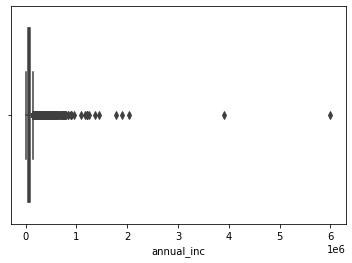

In [394]:
sns.boxplot(loan_data.annual_inc)

In [396]:

#there are a lot of ooutliers which need to be treated. let us find the quantiles for this data

In [402]:
loan_data.annual_inc.quantile([0,0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99,1])

0.00       4000.00
0.01      14400.00
0.05      24000.00
0.25      40404.00
0.50      59000.00
0.75      82300.00
0.90     116000.00
0.95     142000.00
0.99     234999.36
1.00    6000000.00
Name: annual_inc, dtype: float64

In [404]:
loan_data= loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

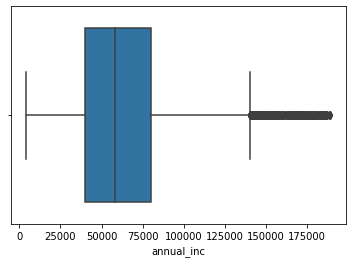

In [405]:
sns.boxplot(loan_data.annual_inc)

<AxesSubplot:xlabel='loan_amnt'>

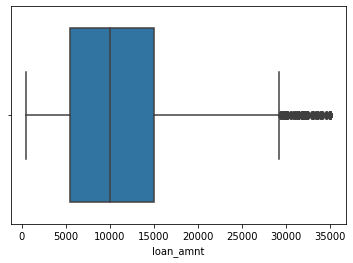

In [317]:
sns.boxplot(loan_data.loan_amnt)

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

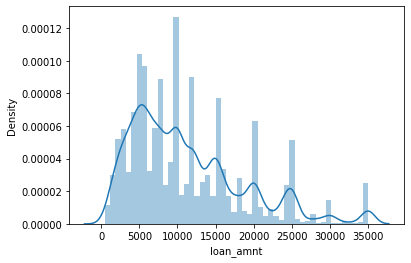

In [318]:
sns.distplot(loan_data.loan_amnt)

In [319]:
# there is a spike at all multiples of 5000s
# majority of loans taken are with amount of 10000
# and there is an increase in number of loans at 35000
# this peaks are expected as most of the people apply loans with rounded figures.

In [320]:
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [321]:
#There are only 2 terms that are 36 or 60 months

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

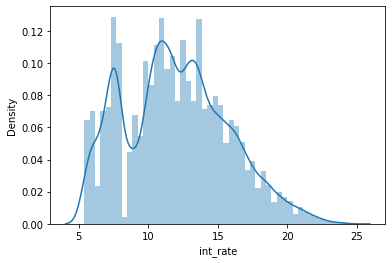

In [322]:
sns.distplot(loan_data.int_rate)

In [323]:
loan_data.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [324]:
# majority of loans are around 9 - 14% and there are few below 9 and above 14

In [325]:
loan_data.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [326]:
# majority of loans have grade B & A

In [327]:
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [328]:
loan_data.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [414]:
#Since there are only 3 NONE we can't make much insight of it, so let us remove it as outlier
loan_data = loan_data[loan_data.home_ownership != 'NONE']

In [329]:
# very few people have own houses in entire distribution of data
# people with own house are less likely to apply for a loan compared to rented/mortgaged houses

In [330]:
loan_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [331]:
# there are some members whose annual income is very high, these needs to be checked as part of outlier filters

In [332]:
loan_data.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [333]:
# majority of loans are taken for debt_consolidation or credit card

In [334]:
loan_data.zip_code.value_counts()

100    597
945    545
112    516
606    503
70     473
      ... 
381      1
378      1
739      1
396      1
469      1
Name: zip_code, Length: 823, dtype: int64

In [335]:
loan_data.addr_state.value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [336]:
# Majority of the loans taken are from CA  

In [337]:
loan_data.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [338]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [363]:
#Segmented Univariate Analysis

In [416]:
pd.pivot_table(loan_data,index='home_ownership',values=['annual_inc','dti','loan_amnt','int_rate'] ,aggfunc=np.mean)

,annual_inc,dti,int_rate,loan_amnt
home_ownership,,,,
MORTGAGE,75663.655792,13.303822,11.728925,12461.388905
OTHER,62656.336842,11.316105,11.993368,10368.157895
OWN,54760.974072,13.345110,11.757904,10082.343646
RENT,55075.404244,13.528969,12.280913,9942.732853


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
39318,214993,10000,10000,1228.06,36 months,7.75,312.22,A,A3,ups,5 years,NONE,22200.0,Not Verified,2008-01-01,Fully Paid,debt_consolidation,233,VA,5.24
39659,121574,4000,4000,1925.00,36 months,9.64,128.41,B,B4,,< 1 year,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,other,950,CA,15.00
39660,121373,2800,2800,1625.00,36 months,8.70,88.65,B,B1,,< 1 year,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,other,24,MA,15.00


In [419]:
pd.pivot_table(loan_data,index='verification_status',values=['annual_inc','dti','loan_amnt','int_rate'] ,aggfunc=np.median)

,annual_inc,dti,int_rate,loan_amnt
verification_status,,,,
Not Verified,52000.0,13.19,11.12,7500
Source Verified,55000.0,12.74,11.86,8625
Verified,68000.0,14.63,12.84,15000


In [ ]:
# we see that verified individuals have more annual income and more loan amount, where as least for Not Verified

In [421]:
pd.pivot_table(loan_data,index='loan_status',values=['annual_inc','dti','loan_amnt','int_rate', 'inq_last_6mths','mort_acc'] ,aggfunc=np.mean)

,annual_inc,dti,inq_last_6mths,int_rate,loan_amnt
loan_status,,,,,
Charged Off,58914.517245,14.063037,1.055325,13.799130,11985.582988
Current,71233.657903,14.880869,0.783154,14.981971,16895.743728
Fully Paid,64755.249039,13.247422,0.835245,11.584343,10699.275418


In [ ]:
#Loans having lower interest rate are more likely to be Fully Paid, rather than the ones with higher rates.

In [339]:
# we don't see any value addition doing univariate for other variables, most of them needs corelation. 
# Hence let's start bi/multi variate analysis

In [340]:
loan_data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
member_id,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.015950,0.096963,-0.047086,...,0.170743,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,-0.008769
loan_amnt,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,-0.002120,0.066439,0.009229,...,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,-0.037180
funded_amnt,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,-0.002445,0.066283,0.009259,...,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,-0.038502
funded_amnt_inv,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,-0.002176,0.074689,-0.005712,...,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,-0.042746
int_rate,0.074725,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.009843,0.111162,0.133013,...,0.134616,0.134668,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.082550
installment,0.081025,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.003031,0.054186,0.009722,...,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,-0.034103
annual_inc,0.009380,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.004799,-0.122732,0.033908,...,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,-0.016801
zip_code,0.015950,-0.002120,-0.002445,-0.002176,0.009843,0.003031,-0.004799,1.000000,0.016692,-0.020273,...,-0.011144,-0.011029,-0.010402,-0.009435,-0.010460,-0.008088,-0.013007,0.001511,0.001914,0.032005
dti,0.096963,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,0.016692,1.000000,0.001405,...,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005691
inq_last_6mths,-0.047086,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,-0.020273,0.001405,1.000000,...,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.016346


In [341]:
loan_data.corr() > 0.5

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
member_id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
loan_amnt,False,True,True,True,False,True,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
funded_amnt,False,True,True,True,False,True,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
funded_amnt_inv,False,True,True,True,False,True,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
int_rate,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
installment,False,True,True,True,False,True,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
annual_inc,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zip_code,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


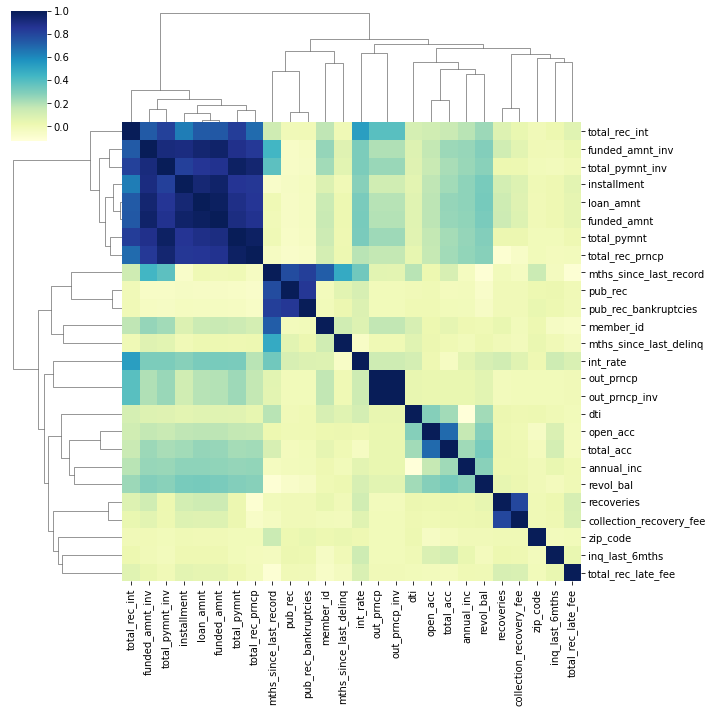

In [347]:
sns.clustermap(loan_data.corr(),cmap="YlGnBu")

In [348]:
# From the above map it is evident that the following groups are higly correlated:
# 1. [total_rec_int, funded_amnt_inv, total_pymnt_inv, installment, loan_amnt, funded_amnt, total_pymnt, total_rec_prncp]
# 2. [mths_since_last_record, pub_rec, pub_rec_bankruptcies]
# 3. [dti, open_acc, total_acc, annual_inc, revol_bal]

In [358]:
# We have three groups of numeric/continuous variables which are correlated within each group.
# And we also have few categorical variables like: [home_ownership, grade, term, emp_length, loan_status, purpose_zipcode, verification_status]

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

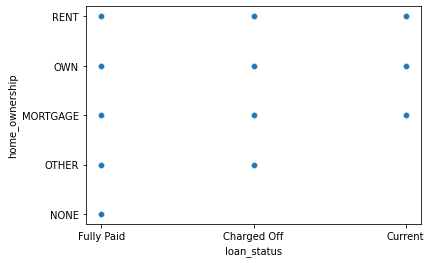

In [362]:
sns.scatterplot(y=loan_data.home_ownership,x=loan_data.loan_status)